BACKGROUND: The survey is conducted within a large organization to assess satisfaction level of employees in various functions. The satisfaction level is measured on 1-5 scale where higher a number indicates more satisfaction.

QUESTIONS
1. Import EMPLOYEE SATISFACTION SURVEY data. Check for normality of the data.
2. Find median satisfaction level for ‘IT’, ‘Sales’ and ‘Finance’. Test whether the
satisfaction level among three roles differ significantly.
3. Is there any association between satisfaction level and experience level? Experience
level is defined as midlevel (greater than 2 years) and Junior (less than or equal to 2
years).
4. Find number of employees with satisfaction score greater than 3 in each department

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        52 non-null     int64  
 1   dept      52 non-null     object 
 2   satlevel  52 non-null     int64  
 3   exp       52 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ KB
None
ShapiroResult(statistic=0.8754841191913469, pvalue=6.0480640437013314e-05)


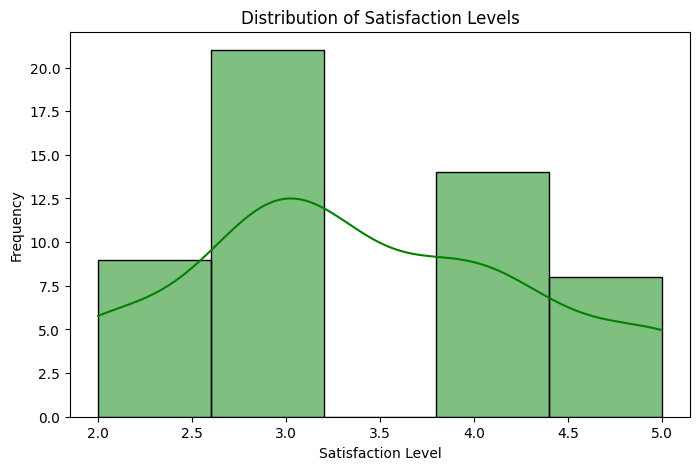

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

employee_data = pd.read_csv("/content/EMPLOYEE SATISFACTION SURVEY.csv")
print(employee_data.info())

# Check for normality
normality_test = stats.shapiro(employee_data['satlevel'])
print(normality_test)

# Visualize the distribution of satisfaction levels
plt.figure(figsize=(8, 5))
sns.histplot(employee_data['satlevel'], bins=5, color='Green', kde=True)
plt.title('Distribution of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()


We reject the null hypothesis that the satisfaction level data follows a normal distribution.
This indicates that the satisfaction levels of employees in the organization do not exhibit a normal distribution pattern suggesting that non-parametric statistical methods may be more appropriate for further analysis.

In [ ]:
# Find the median satisfaction level for each department
median_satisfaction = employee_data.groupby('dept')['satlevel'].median().reset_index()
print(median_satisfaction)

      dept  satlevel
0  FINANCE       4.0
1       IT       3.0
2    SALES       3.0


The median satisfaction level for the Finance department is higher than that of both the IT and Sales departments. This suggests that, on average, employees in the Finance department report a greater level of satisfaction compared to their counterparts in IT and Sales.

In [ ]:
# ANOVA to test if satisfaction levels differ significantly
anova_result = stats.f_oneway(
    employee_data[employee_data['dept'] == 'IT']['satlevel'],
    employee_data[employee_data['dept'] == 'SALES']['satlevel'],
    employee_data[employee_data['dept'] == 'FINANCE']['satlevel']
)
print(anova_result)

F_onewayResult(statistic=24.99143383724634, pvalue=3.300526179827502e-08)


The low p-value suggests that at least one department's satisfaction level is significantly different from the others. In other words there is a statistically significant difference in satisfaction levels among the departments .

In [ ]:
# new variable for experience level
employee_data['exp_level'] = employee_data['exp'].apply(lambda x: 'Midlevel' if x > 2 else 'Junior')

# Chi-squared test
contingency_table = pd.crosstab(employee_data['satlevel'], employee_data['exp_level'])
chi_squared_result = stats.chi2_contingency(contingency_table)
print(chi_squared_result)

Chi2ContingencyResult(statistic=1.7757787772780276, pvalue=0.6202198757608164, dof=3, expected_freq=array([[ 3.98076923,  5.01923077],
       [ 9.28846154, 11.71153846],
       [ 6.19230769,  7.80769231],
       [ 3.53846154,  4.46153846]]))


The p-value suggests that there is no statistically significant association between satisfaction level and experience level. In other words, satisfaction levels do not differ in a meaningful way between employees with junior or mid-level experience based on this data.

In [ ]:
# Count number of employees with satisfaction score greater than 3 in each department
count_above_3 = employee_data[employee_data['satlevel'] > 3].groupby('dept').size().reset_index(name='count')
print(count_above_3)

      dept  count
0  FINANCE     16
1       IT      4
2    SALES      2
